Random Forest

In [ ]:
#USED K-BEST ANOVA - 25 FEATURES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

# Select features and target columns
features = ['Querylength', 'domain_token_count', 'path_token_count',
            'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
            'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
            'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
            'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
            'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
            'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
            'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
            'ISIpAddressInDomainName', 'CharacterContinuityRate',
            'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
            'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
            'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
            'Directory_LetterCount', 'Filename_LetterCount',
            'Extension_LetterCount', 'Query_LetterCount', 'LongestPathTokenLength',
            'Domain_LongestWordLength', 'Path_LongestWordLength',
            'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength',
            'URL_sensitiveWord', 'URLQueries_variable', 'spcharUrl',
            'delimeter_Domain', 'delimeter_path', 'delimeter_Count',
            'NumberRate_URL', 'NumberRate_Domain', 'NumberRate_DirectoryName',
            'NumberRate_FileName', 'NumberRate_Extension', 'NumberRate_AfterPath',
            'SymbolCount_URL', 'SymbolCount_Domain', 'SymbolCount_Directoryname',
            'SymbolCount_FileName', 'SymbolCount_Extension',
            'SymbolCount_Afterpath', 'Entropy_URL', 'Entropy_Domain',
            'Entropy_DirectoryName', 'Entropy_Filename', 'Entropy_Extension',
            'Entropy_Afterpath', 'url_type']

# Clean the dataset by removing NaNs and infinities in numeric columns only
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

numeric_features = [f for f in features if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])
X = df_cleaned[numeric_features + ['tld_encoded']]
y = df_cleaned['binary_label'] = df_cleaned['url_type'].apply(lambda x: 0 if x == 'benign' else 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=df_cleaned['binary_label']
)

# Initialize and fit the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Classification reports
print("Binary Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

print("\nBinary Classification Report - Test Data:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Multiclass Classification
malicious_df = df_cleaned[df_cleaned['binary_label'] == 1].copy()
X_multi = malicious_df[numeric_features + ['tld_encoded']]
y_multi = malicious_df['url_type_encoded']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.4, random_state=42, stratify=y_multi
)
rf_multiclass_classifier = RandomForestClassifier(random_state=42)
rf_multiclass_classifier.fit(X_train_multi, y_train_multi)

# Predictions and Evaluations for Multiclass
y_train_pred_multi = rf_multiclass_classifier.predict(X_train_multi)
y_test_pred_multi = rf_multiclass_classifier.predict(X_test_multi)
print("Multiclass Classification Report (Training):")
print(classification_report(y_train_multi, y_train_pred_multi))
print("Multiclass Classification Report (Test):")
print(classification_report(y_test_multi, y_test_pred_multi))

# Accuracy Summary
train_accuracy_bin = accuracy_score(y_train, y_train_pred)
test_accuracy_bin = accuracy_score(y_test, y_test_pred)
train_accuracy_multi = accuracy_score(y_train_multi, y_train_pred_multi)
test_accuracy_multi = accuracy_score(y_test_multi, y_test_pred_multi)

print(f"Binary Classification - Train Accuracy: {train_accuracy_bin:.4f}")
print(f"Binary Classification - Test Accuracy: {test_accuracy_bin:.4f}")
print(f"Multiclass Classification - Train Accuracy: {train_accuracy_multi:.4f}")
print(f"Multiclass Classification - Test Accuracy: {test_accuracy_multi:.4f}")


Binary Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    299672
           1       0.99      0.99      0.99    156161

    accuracy                           0.99    455833
   macro avg       0.99      0.99      0.99    455833
weighted avg       0.99      0.99      0.99    455833

Training Accuracy: 0.992402919490252

Binary Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    128431
           1       0.97      0.95      0.96     66927

    accuracy                           0.97    195358
   macro avg       0.97      0.97      0.97    195358
weighted avg       0.97      0.97      0.97    195358

Test Accuracy: 0.9722458256124653
Multiclass Classification Report (Training):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     57874
           2       1.00      0.9

In [1]:
##FYI.
## Buat hyperparameter disini belum diimplementasiin. Cari juga berapa hyperparameter, 
## apa hyperparameternya, dan berapa setting paling baik untuk parameter tersebut

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
import os 
import joblib

# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

## Ini Featuresnya secara total
# Select features and target columns
features = ['Querylength', 'domain_token_count', 'path_token_count', 'avgdomaintokenlen', 'longdomaintokenlen', 
            'avgpathtokenlen', 'tld', 'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path', 
            'ldl_filename', 'ldl_getArg', 'subDirLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio', 
            'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio', 'argPathRatio', 'executable', 
            'isPortEighty', 'NumberofDotsinURL', 'ISIpAddressInDomainName', 'CharacterContinuityRate', 
            'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount', 'Directory_DigitCount', 
            'File_name_DigitCount', 'Extension_DigitCount', 'Query_DigitCount', 'URL_Letter_Count', 
            'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount', 'Extension_LetterCount', 
            'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength', 'Path_LongestWordLength', 
            'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength', 'URL_sensitiveWord', 
            'URLQueries_variable', 'spcharUrl', 'delimeter_Domain', 'delimeter_path', 'delimeter_Count', 
            'NumberRate_URL', 'NumberRate_Domain', 'NumberRate_DirectoryName', 'NumberRate_FileName', 
            'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_URL', 'SymbolCount_Domain', 
            'SymbolCount_Directoryname', 'SymbolCount_FileName', 'SymbolCount_Extension', 'SymbolCount_Afterpath', 
            'Entropy_URL', 'Entropy_Domain', 'Entropy_Filename', 'Entropy_Extension', 'Entropy_Afterpath']

## Ini buat encoding dan cleaning, karena algorithmnya hanya menerima numeric. Kaya tld sama url_type harus di encode.
# Clean the dataset by removing NaNs and infinities in numeric columns only
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

numeric_features = [f for f in features if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

# Encode 'tld' and 'url_type'
label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])

# Set up features and labels
X = df_cleaned[numeric_features + ['tld_encoded']]
y = df_cleaned['binary_label'] = df_cleaned['url_type'].apply(lambda x: 0 if x == 'benign' else 1)

# Select features including both numeric and encoded categorical features
all_features = numeric_features + ['tld_encoded']  # Ensure we include the encoded 'tld' feature

## Ini buat pick best featuresnya. sebenernya ada beberapa metode, cuman yang gue taro sekarang itu pake K-Best yang variasi ANOVA
# Apply ANOVA feature selection (K-Best) on all_features
k_best_selector = SelectKBest(score_func=f_classif, k=25)
X_selected = k_best_selector.fit_transform(X[all_features], y)

# Get the selected feature names
selected_features = [all_features[i] for i in k_best_selector.get_support(indices=True)]
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

## Ini gue nyoba-nyoba, karena datanya itu imbalance, make undersampler jadi semua datanya itu bakal jadi 400,000 per tipe url
# Apply undersampling to balance classes at 40,000 samples per URL type
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(sampling_strategy={label: 40000 for label in y.unique()}, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_selected_df, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Initialize and fit the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions for Binary Classification
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Classification reports
print("Binary Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

print("\nBinary Classification Report - Test Data:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Multiclass Classification for malicious URL types
malicious_df = df_cleaned[df_cleaned['binary_label'] == 1].copy()

# Reapply feature selection for the multiclass problem
X_multi = malicious_df[all_features]  # Use all features for selection again
y_multi = malicious_df['url_type_encoded']

# Apply ANOVA (K-Best) specifically for multiclass feature selection
k_best_selector_multi = SelectKBest(score_func=f_classif, k=25)  # Adjust k as needed for multiclass
X_multi_selected = k_best_selector_multi.fit_transform(X_multi, y_multi)

# Get the selected features for multiclass
selected_features_multi = [all_features[i] for i in k_best_selector_multi.get_support(indices=True)]
X_multi_selected_df = pd.DataFrame(X_multi_selected, columns=selected_features_multi)

# Train-Test Split for Multiclass
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi_selected_df, y_multi, test_size=0.4, random_state=42, stratify=y_multi
)

# Train the Random Forest classifier for Multiclass
rf_multiclass_classifier = RandomForestClassifier(random_state=42)
rf_multiclass_classifier.fit(X_train_multi, y_train_multi)

# Predictions and Evaluations for Multiclass
y_train_pred_multi = rf_multiclass_classifier.predict(X_train_multi)
y_test_pred_multi = rf_multiclass_classifier.predict(X_test_multi)

# Print classification reports for Multiclass
print("Multiclass Classification Report (Training):")
print(classification_report(y_train_multi, y_train_pred_multi))
print("Multiclass Classification Report (Test):")
print(classification_report(y_test_multi, y_test_pred_multi))

# Accuracy Summary
train_accuracy_bin = accuracy_score(y_train, y_train_pred)
test_accuracy_bin = accuracy_score(y_test, y_test_pred)
train_accuracy_multi = accuracy_score(y_train_multi, y_train_pred_multi)
test_accuracy_multi = accuracy_score(y_test_multi, y_test_pred_multi)

print(f"Binary Classification - Train Accuracy: {train_accuracy_bin:.4f}")
print(f"Binary Classification - Test Accuracy: {test_accuracy_bin:.4f}")
print(f"Multiclass Classification - Train Accuracy: {train_accuracy_multi:.4f}")
print(f"Multiclass Classification - Test Accuracy: {test_accuracy_multi:.4f}")

# Specify the folder path where you want to save the model
folder_path = '../extension/ml'
os.makedirs(folder_path, exist_ok=True)  # Create the folder if it doesn't exist

# Save the trained binary model to a file
joblib.dump(rf_classifier, os.path.join(folder_path, 'test1.pkl'))


Binary Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     28000
           1       1.00      0.99      1.00     28000

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000

Training Accuracy: 0.9957857142857143

Binary Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     12000
           1       0.97      0.95      0.96     12000

    accuracy                           0.96     24000
   macro avg       0.96      0.96      0.96     24000
weighted avg       0.96      0.96      0.96     24000

Test Accuracy: 0.959
Multiclass Classification Report (Training):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     57874
           2       1.00      0.98      0.99 

['../extension/ml\\test1.pkl']

In [2]:
mask = k_best_selector.get_support()
# Get the names of selected features
selected_features = X.columns[mask]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['domain_token_count', 'path_token_count', 'avgdomaintokenlen',
       'longdomaintokenlen', 'ldl_domain', 'ldl_path', 'subDirLen',
       'pathurlRatio', 'argDomanRatio', 'domainUrlRatio', 'NumberofDotsinURL',
       'CharacterContinuityRate', 'host_DigitCount', 'host_letter_count',
       'Directory_LetterCount', 'Domain_LongestWordLength',
       'sub-Directory_LongestWordLength', 'URLQueries_variable',
       'delimeter_Domain', 'delimeter_Count', 'NumberRate_Domain',
       'SymbolCount_URL', 'SymbolCount_Domain', 'Entropy_Domain',
       'tld_encoded'],
      dtype='object')


Binary Confusion Matrix (Test):
[[11618   382]
 [  602 11398]]


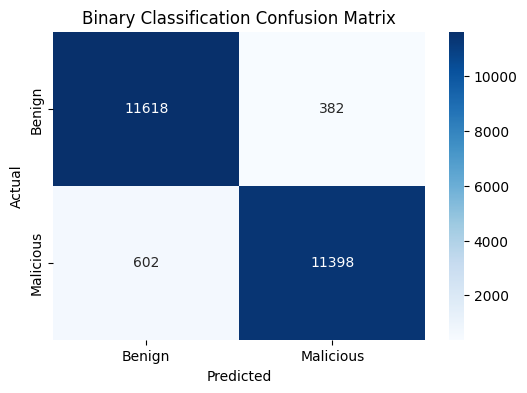

Multiclass Confusion Matrix (Test):
[[38380    20   183]
 [  171 12242   595]
 [ 1136   132 36377]]


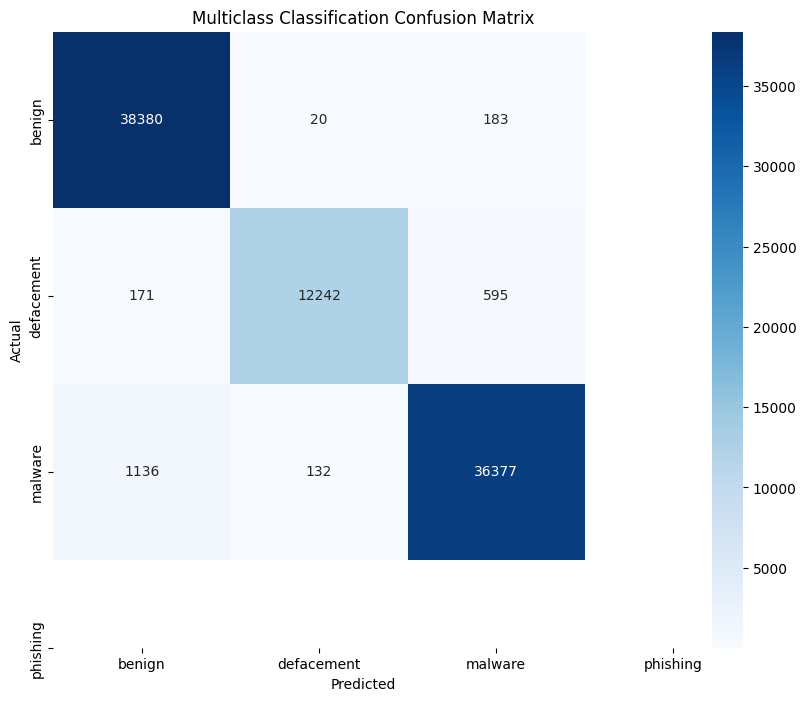

In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Confusion Matrix
binary_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Binary Confusion Matrix (Test):")
print(binary_conf_matrix)

# Plot Binary Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(binary_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title("Binary Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Multiclass Confusion Matrix
multi_conf_matrix = confusion_matrix(y_test_multi, y_test_pred_multi)
print("Multiclass Confusion Matrix (Test):")
print(multi_conf_matrix)

# Plot Multiclass Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(multi_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder_url_type.classes_, yticklabels=label_encoder_url_type.classes_)
plt.title("Multiclass Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [1]:

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

df.head

<bound method NDFrame.head of         Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
0                 0                   1                 4                0.0   
1                 0                   1                 6                0.0   
2                 0                   1                 6                0.0   
3                49                   4                 3                4.5   
4               194                   3                 3                7.0   
...             ...                 ...               ...                ...   
651186            0                   1                 7                0.0   
651187            0                   1                 9                0.0   
651188            0                   1                 7                0.0   
651189            0                   1                 8                0.0   
651190            0                   1                 6                0.0   

        l

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import time
import psutil

# Start measuring time and resources
start_time = time.time()
process = psutil.Process()

# Memory and CPU usage before the execution
start_memory = process.memory_info().rss / (1024 ** 2)  # Convert to MB
start_cpu_times = process.cpu_times()

# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

# Select features and target columns
features = ['Querylength', 'domain_token_count', 'path_token_count', 'avgdomaintokenlen', 'longdomaintokenlen', 
            'avgpathtokenlen', 'tld', 'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path', 
            'ldl_filename', 'ldl_getArg', 'subDirLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio', 
            'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio', 'argPathRatio', 'executable', 
            'isPortEighty', 'NumberofDotsinURL', 'ISIpAddressInDomainName', 'CharacterContinuityRate', 
            'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount', 'Directory_DigitCount', 
            'File_name_DigitCount', 'Extension_DigitCount', 'Query_DigitCount', 'URL_Letter_Count', 
            'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount', 'Extension_LetterCount', 
            'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength', 'Path_LongestWordLength', 
            'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength', 'URL_sensitiveWord', 
            'URLQueries_variable', 'spcharUrl', 'delimeter_Domain', 'delimeter_path', 'delimeter_Count', 
            'NumberRate_URL', 'NumberRate_Domain', 'NumberRate_DirectoryName', 'NumberRate_FileName', 
            'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_URL', 'SymbolCount_Domain', 
            'SymbolCount_Directoryname', 'SymbolCount_FileName', 'SymbolCount_Extension', 'SymbolCount_Afterpath', 
            'Entropy_URL', 'Entropy_Domain', 'Entropy_Filename', 'Entropy_Extension', 'Entropy_Afterpath']

# Clean the dataset
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

numeric_features = [f for f in features if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])
X = df_cleaned[numeric_features + ['tld_encoded']]
y = df_cleaned['binary_label'] = df_cleaned['url_type'].apply(lambda x: 0 if x == 'benign' else 1)

# Apply undersampling for binary classification
under_sampler = RandomUnderSampler(sampling_strategy={label: 40000 for label in y.unique()}, random_state=42)
X_resampled_binary, y_resampled_binary = under_sampler.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_binary, y_resampled_binary, test_size=0.3, random_state=42, stratify=y_resampled_binary
)

# Initialize and fit the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Print classification reports
print("Binary Classification Report - Training Data:")
print(classification_report(y_train, y_train_pred))
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

print("\nBinary Classification Report - Test Data:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Multiclass Classification
malicious_df = df_cleaned[df_cleaned['binary_label'] == 1].copy()
X_multi = malicious_df[numeric_features + ['tld_encoded']]
y_multi = malicious_df['url_type_encoded']
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.4, random_state=42, stratify=y_multi
)
rf_multiclass_classifier = RandomForestClassifier(random_state=42)
rf_multiclass_classifier.fit(X_train_multi, y_train_multi)

# Predictions and Evaluations for Multiclass
y_train_pred_multi = rf_multiclass_classifier.predict(X_train_multi)
y_test_pred_multi = rf_multiclass_classifier.predict(X_test_multi)
print("Multiclass Classification Report (Training):")
print(classification_report(y_train_multi, y_train_pred_multi))
print("Multiclass Classification Report (Test):")
print(classification_report(y_test_multi, y_test_pred_multi))

# End measuring time and resources
end_time = time.time()
end_memory = process.memory_info().rss / (1024 ** 2)  # Convert to MB
end_cpu_times = process.cpu_times()

# Print execution time and resource usage
print(f"\nExecution Time: {end_time - start_time:.2f} seconds")
print(f"Memory Used: {end_memory - start_memory:.2f} MB")
print(f"CPU Times - User: {end_cpu_times.user - start_cpu_times.user:.2f}s, "
      f"System: {end_cpu_times.system - start_cpu_times.system:.2f}s")


Binary Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28000
           1       1.00      1.00      1.00     28000

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000

Training Accuracy: 0.9997857142857143

Binary Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12000
           1       0.98      0.95      0.96     12000

    accuracy                           0.97     24000
   macro avg       0.97      0.97      0.97     24000
weighted avg       0.97      0.97      0.97     24000

Test Accuracy: 0.965125
Multiclass Classification Report (Training):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     57874
           2       1.00      0.99      0.

In [4]:
print("\nBinary Classification Report - Test Data:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Binary Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12000
           1       0.98      0.95      0.96     12000

    accuracy                           0.97     24000
   macro avg       0.97      0.97      0.97     24000
weighted avg       0.97      0.97      0.97     24000

Test Accuracy: 0.965125


In [5]:
print("\nMulticlass Classification Report - Test Data:")
print(classification_report(y_test_multi, y_test_pred_multi))
print("Test Accuracy:", accuracy_score(y_test_multi, y_test_pred_multi))


Multiclass Classification Report - Test Data:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99     38583
           2       0.99      0.96      0.97     13008
           3       0.98      0.98      0.98     37645

    accuracy                           0.98     89236
   macro avg       0.98      0.98      0.98     89236
weighted avg       0.98      0.98      0.98     89236

Test Accuracy: 0.9823949975346273


Binary Confusion Matrix (Test):
[[11726   274]
 [  563 11437]]


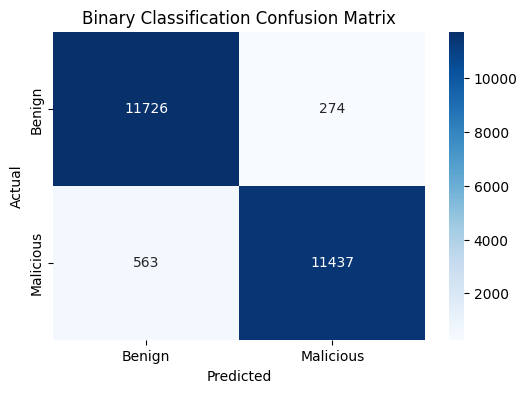

Multiclass Confusion Matrix (Test):
[[38402     5   176]
 [   76 12465   467]
 [  718   129 36798]]


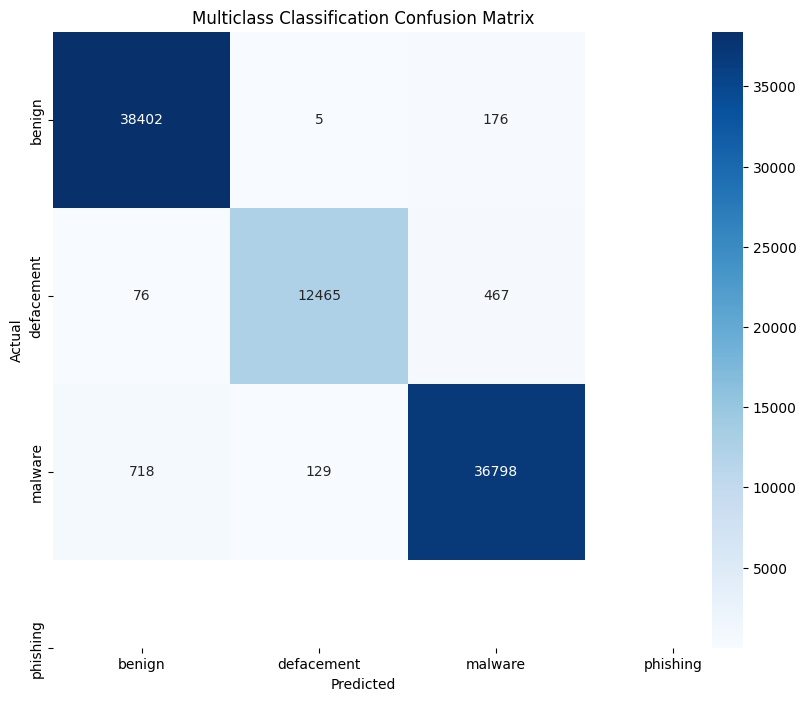

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Confusion Matrix
binary_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Binary Confusion Matrix (Test):")
print(binary_conf_matrix)

# Plot Binary Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(binary_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.title("Binary Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Multiclass Confusion Matrix
multi_conf_matrix = confusion_matrix(y_test_multi, y_test_pred_multi)
print("Multiclass Confusion Matrix (Test):")
print(multi_conf_matrix)

# Plot Multiclass Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(multi_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder_url_type.classes_, yticklabels=label_encoder_url_type.classes_)
plt.title("Multiclass Classification Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
